# K Nearest Neighbours - Project V1.0

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get Data for Modeling
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
kp_data = pd.read_csv("Data/KNN_Project_Data")

In [4]:
kp_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### EDA

- Pairplot with hue indicated by "TARET CLASS"

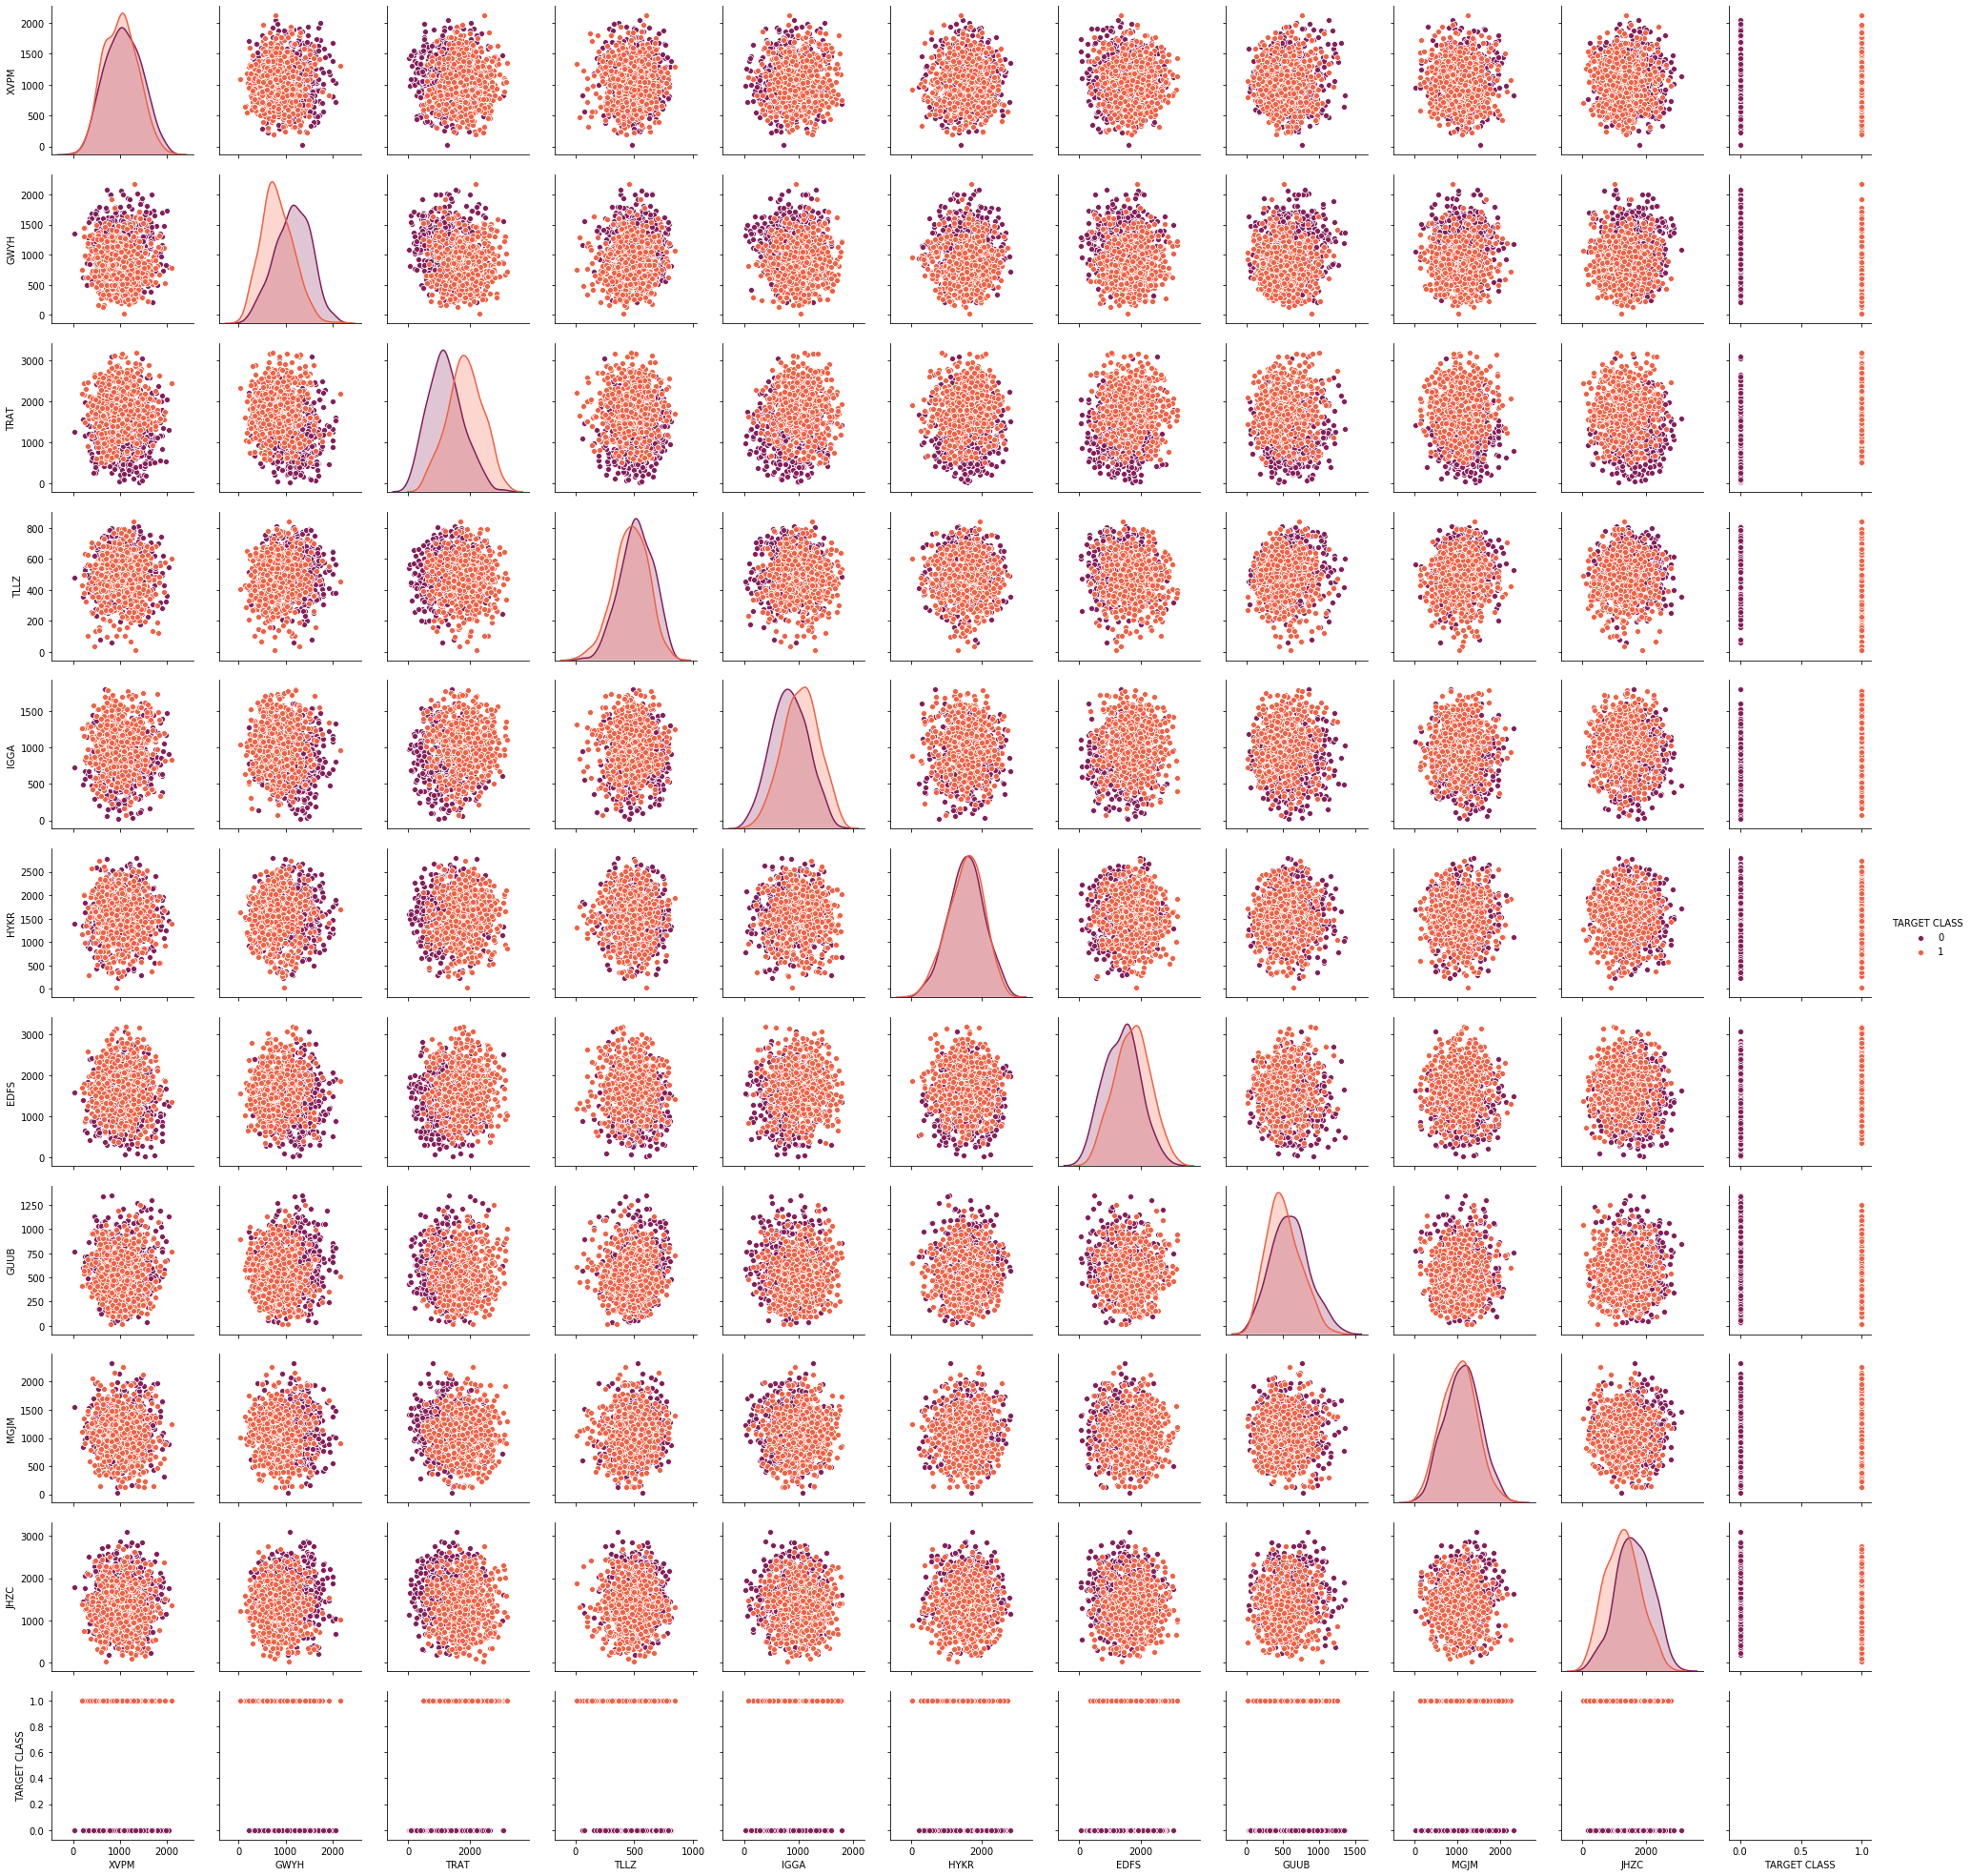

In [9]:
sns.pairplot(kp_data, hue="TARGET CLASS", palette = "rocket")

### Standardize the Variables

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(kp_data.drop("TARGET CLASS", axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_features = scaler.transform(kp_data.drop("TARGET CLASS", axis=1))

In [18]:
features = pd.DataFrame(scaled_features, columns= kp_data.columns[:-1])

In [19]:
features.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, kp_data["TARGET CLASS"])

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [30]:
pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[95 38]
 [26 91]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       133
           1       0.71      0.78      0.74       117

    accuracy                           0.74       250
   macro avg       0.75      0.75      0.74       250
weighted avg       0.75      0.74      0.74       250



- Choosing the Optimum K-Value

In [33]:
error_rate =[]

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

- Plot error_rate

Text(0, 0.5, 'Error Rate')

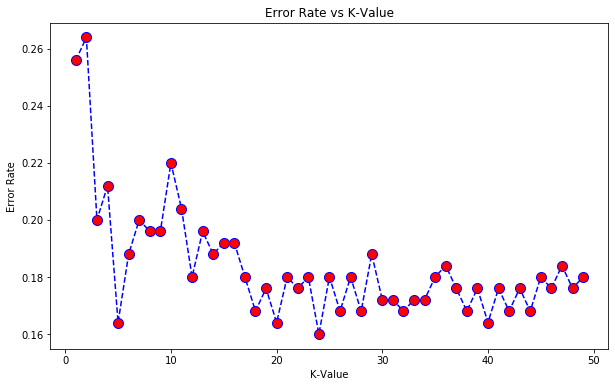

In [34]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 50), error_rate, color='blue', linestyle = 'dashed', marker='o', 
         markerfacecolor='red',markersize=10)
plt.title("Error Rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")

In [35]:
# K-value snd correspeonding error_rate
for i, error_i in enumerate(error_rate):
    print([i, error_i])

[0, 0.256]
[1, 0.264]
[2, 0.2]
[3, 0.212]
[4, 0.164]
[5, 0.188]
[6, 0.2]
[7, 0.196]
[8, 0.196]
[9, 0.22]
[10, 0.204]
[11, 0.18]
[12, 0.196]
[13, 0.188]
[14, 0.192]
[15, 0.192]
[16, 0.18]
[17, 0.168]
[18, 0.176]
[19, 0.164]
[20, 0.18]
[21, 0.176]
[22, 0.18]
[23, 0.16]
[24, 0.18]
[25, 0.168]
[26, 0.18]
[27, 0.168]
[28, 0.188]
[29, 0.172]
[30, 0.172]
[31, 0.168]
[32, 0.172]
[33, 0.172]
[34, 0.18]
[35, 0.184]
[36, 0.176]
[37, 0.168]
[38, 0.176]
[39, 0.164]
[40, 0.176]
[41, 0.168]
[42, 0.176]
[43, 0.168]
[44, 0.18]
[45, 0.176]
[46, 0.184]
[47, 0.176]
[48, 0.18]


In [36]:
# Retrain the model with K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[103  30]
 [ 15 102]]


              precision    recall  f1-score   support

           0       0.87      0.77      0.82       133
           1       0.77      0.87      0.82       117

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250

